In [1]:
from tqdm import tqdm
import pandas as pd
import fasttext
import numpy as np

In [2]:
model = fasttext.load_model("/home/burak/Desktop/cc.en.300.bin")

In [3]:
df = pd.read_csv("processed.csv",encoding="utf-8",lineterminator="\n")

In [46]:
df = df.iloc[:60000]

In [47]:
sent_vectors = []
for item in tqdm(df.iterrows()):
    sent_vectors.append(model.get_sentence_vector(item[1].content))
    
sent_vectors = np.array(sent_vectors)

60000it [00:09, 6426.17it/s]


In [48]:
labels_encoded = []
for item in tqdm(df.iterrows()):
    if item[1].label == "CYBER":
        labels_encoded.append(1)
    else:
        labels_encoded.append(0)
labels_encoded=np.array(labels_encoded)

60000it [00:05, 10916.11it/s]


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(sent_vectors,labels_encoded,test_size=0.20)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=7)

In [70]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=7)

In [71]:
score = rfc.score(X_test, Y_test,)
score

0.96025

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, rfc.predict_proba(X_test)[:,1])

0.990649380930648

In [73]:
from sklearn.metrics import precision_recall_fscore_support
a = precision_recall_fscore_support(Y_test, rfc.predict(X_test), average='macro')
a

(0.9599135339816877, 0.9609108997608768, 0.9601976972865907, None)

12000


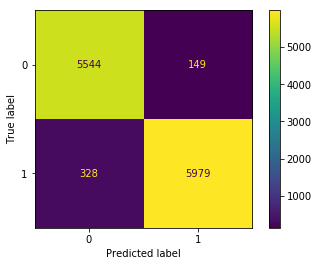

In [74]:
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
print(X_test.shape[0])
plot_confusion_matrix(rfc,X_test, Y_test)

In [80]:
rfc.predict([model.get_sentence_vector("new version of microsoft excel is published")])

array([1])

In [29]:
import pickle
filename = 'random_forest.model'
pickle.dump(rfc, open(filename, 'wb'))

# # some time later...

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)